# Telecom Churn Case Study 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [59]:
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,

### Data Understanding and exploration

In [60]:
telecom.shape

(9269, 226)

In [61]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [62]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.269000e+03,9269.0,9174.0,9174.0,9174.0,9269.000000,9269.000000,9269.000000,9269.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8538.000000,8929.000000,8909.000000,8757.000000,8537.000000,8928.000000,8908.000000,8756.000000,8537.000000,8928.0,8908.0,8756.0,8537.0,8928.000000,8908.000000,8756.000000,8537.000000,8928.000000,8908.000000,8756.000000,8537.000000,8928.000000,8908.000000,8756.000000,8537.000000,8928.000000,8908.000000,8756.000000,8537.000000,926

# Data Preparation 

*   Considering the top 30% of the customers who have spent maximum in the first two months
*   Creating a Churn indicator according to the problem statement



In [63]:
# telecom['av_rech_amt'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2
# # Considering the data only above 70th percentile 
# telecom = telecom[telecom['av_rech_amt'] > telecom['av_rech_amt'].quantile(0.70)]
# telecom['total_usage'] = telecom['total_og_mou_9'] + telecom['total_ic_mou_9'] + telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']
# # Creating Churn indicator 
# telecom['churn'] = np.where(telecom['total_usage']== 0, 1, 0) # Where 0 is False and 1 is True
# telecom['churn'].value_counts()

In [64]:
#Usage Based Churn:
telecom['churn'] = (telecom.total_ic_mou_9 == 0) & (telecom.total_og_mou_9 == 0) & ( (telecom.vol_2g_mb_9 == 0) | (telecom.vol_3g_mb_9 == 0) )

#removing 9th month features
telecom = telecom.drop(list(telecom.filter(regex='_9')), axis=1)

telecom.shape

(9269, 173)

In [65]:
telecom.churn.value_counts()

False    8271
True      998
Name: churn, dtype: int64

In [66]:
# Calculating the churn rate
y = telecom['churn']
churn_rate = (sum(y)/len(y.index))*100
print(churn_rate)

10.767073039162801


In [67]:
# Filtering hight value customer
telecom['av_rech_amt'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7) / (telecom.total_rech_num_6 + telecom.total_rech_num_7)
telecom.av_rech_amt.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

count    9244.000000
mean       48.811223
std        54.793742
min         0.000000
10%        12.300000
20%        17.833333
30%        23.250000
40%        29.357714
50%        36.589978
60%        45.451636
70%        56.600000
80%        71.360000
90%        94.254545
99%       210.070000
max      2005.500000
Name: av_rech_amt, dtype: float64

In [68]:
telecom = telecom[telecom["av_rech_amt"] >=56.387518] 

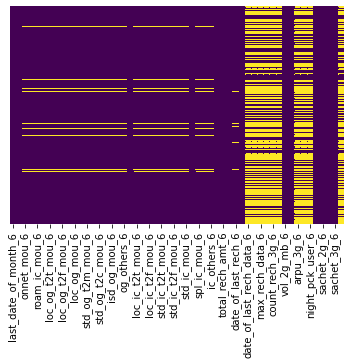

In [69]:
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [70]:
telecom.churn.value_counts()

False    2523
True      268
Name: churn, dtype: int64

In [71]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 9267
Columns: 174 entries, mobile_number to av_rech_amt
dtypes: bool(1), float64(162), int64(2), object(9)
memory usage: 3.7+ MB


In [72]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
telecom.describe(exclude=['bool', 'float64', 'int64'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,2791,2761,2741,2759,2709,2647,944,939,979
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/28/2014,8/30/2014
freq,2791,2761,2741,414,409,322,56,51,74


In [73]:
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'])
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'])
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'])
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'])


In [74]:
telecom.isnull().sum()

mobile_number                  0
circle_id                      0
loc_og_t2o_mou                47
std_og_t2o_mou                47
loc_ic_t2o_mou                47
last_date_of_month_6           0
last_date_of_month_7          30
last_date_of_month_8          50
arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                   92
onnet_mou_7                   96
onnet_mou_8                  157
offnet_mou_6                  92
offnet_mou_7                  96
offnet_mou_8                 157
roam_ic_mou_6                 92
roam_ic_mou_7                 96
roam_ic_mou_8                157
roam_og_mou_6                 92
roam_og_mou_7                 96
roam_og_mou_8                157
loc_og_t2t_mou_6              92
loc_og_t2t_mou_7              96
loc_og_t2t_mou_8             157
loc_og_t2m_mou_6              92
loc_og_t2m_mou_7              96
loc_og_t2m_mou_8             157
loc_og_t2f_mou_6              92
loc_og_t2f

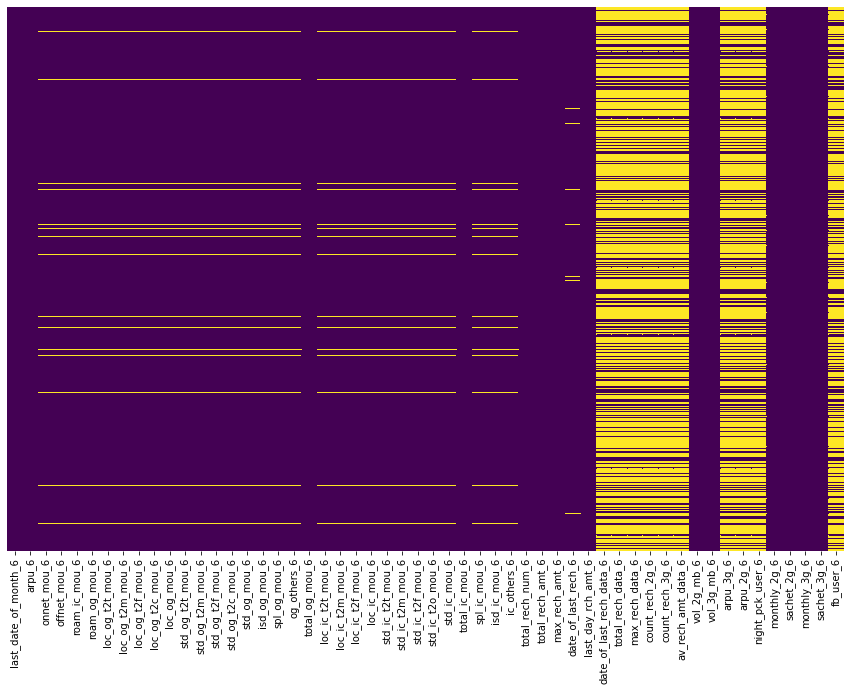

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_6'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

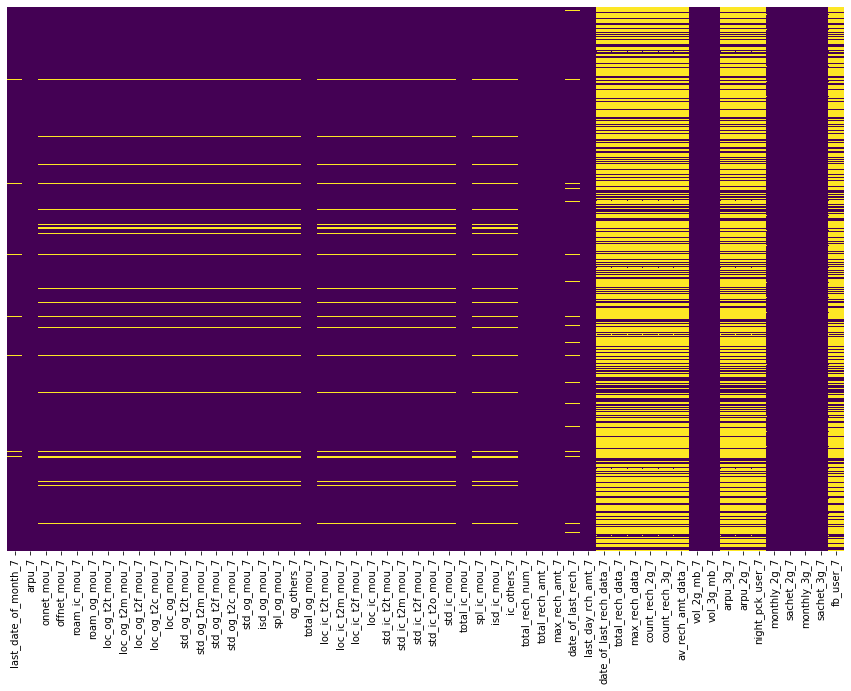

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_7'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

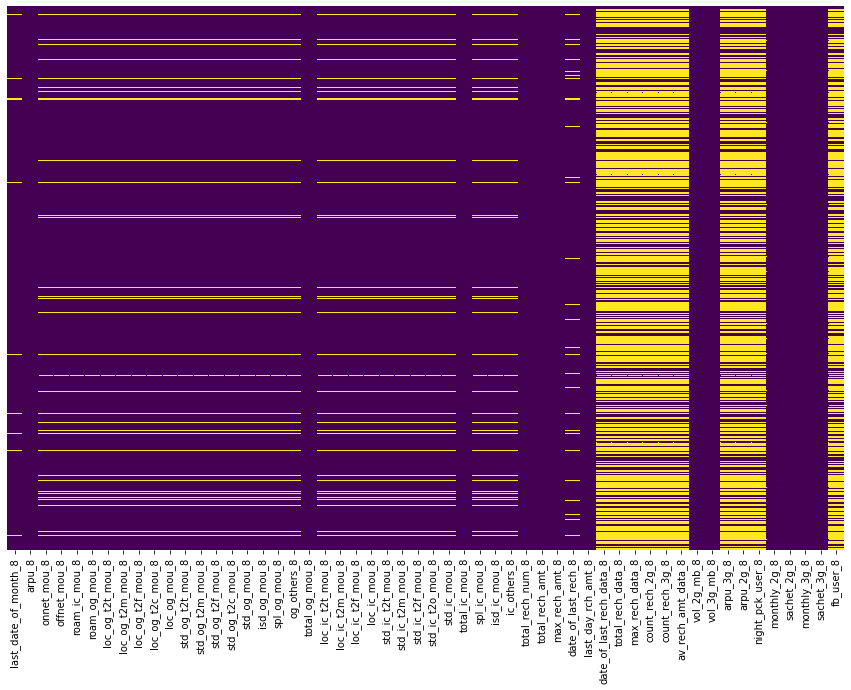

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom[list(telecom.filter(regex='_8'))].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [78]:
#dropping cols which are showing zero variance
telecom = telecom.drop(['date_of_last_rech_data_6', 'total_rech_data_6', 
                        'max_rech_data_6', 'count_rech_2g_6', 
                        'count_rech_3g_6', 'av_rech_amt_data_6', 
                        'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 
                        'fb_user_6','date_of_last_rech_data_7', 
                        'total_rech_data_7', 'max_rech_data_7', 
                        'count_rech_2g_7', 'count_rech_3g_7', 
                        'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 
                        'night_pck_user_7', 'fb_user_7','date_of_last_rech_data_8', 
                        'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 
                        'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 
                        'arpu_2g_8', 'night_pck_user_8', 'fb_user_8'], axis=1)

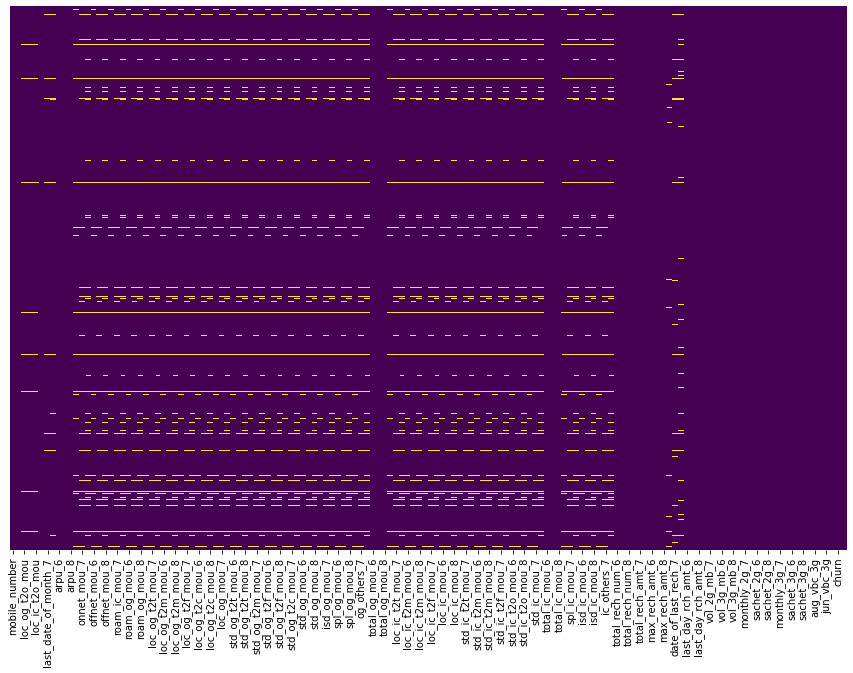

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [80]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,2.791000e+03,2791.0,2744.0,2744.0,2744.0,2791.000000,2791.000000,2791.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.0,2695.0,2634.0,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2791.000000,2791.000000,2791.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.00000,2634.000000,2699.00000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.0,2695.0,2634.0,2699.000000,2695.000000,2634.000000,2791.000000,2791.000000,2791.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.00000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,7.001267e+09,109.0,0.0,0.0,0.0,478.610716,465.617973,435.351014,232.991260,230.256256,216.809514,342.381715,340.479269,310.462111,14.322245,11.328007,10.841739,27.036295,19.354768,17.370247,91.767781,86.134419,85.644768,168.190267,166.638334,166.707016,8.436258,8.058111,7.801803,1.204213,1.317774,1.318686,268.403423,260.839826,260.162418,131.301801,136.664212,124.177118,140.287399,145.616442,118.274844,2.630352,2.88069

In [81]:
# Dropping columns which are having constant values
telecom = telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                        'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
                        'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 
                        'last_date_of_month_6', 'last_date_of_month_7', 
                        'last_date_of_month_8', 'date_of_last_rech_6', 
                        'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
telecom.shape

(2791, 129)

In [82]:
telecom.isnull().sum()

mobile_number           0
circle_id               0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6            92
onnet_mou_7            96
onnet_mou_8           157
offnet_mou_6           92
offnet_mou_7           96
offnet_mou_8          157
roam_ic_mou_6          92
roam_ic_mou_7          96
roam_ic_mou_8         157
roam_og_mou_6          92
roam_og_mou_7          96
roam_og_mou_8         157
loc_og_t2t_mou_6       92
loc_og_t2t_mou_7       96
loc_og_t2t_mou_8      157
loc_og_t2m_mou_6       92
loc_og_t2m_mou_7       96
loc_og_t2m_mou_8      157
loc_og_t2f_mou_6       92
loc_og_t2f_mou_7       96
loc_og_t2f_mou_8      157
loc_og_t2c_mou_6       92
loc_og_t2c_mou_7       96
loc_og_t2c_mou_8      157
loc_og_mou_6           92
loc_og_mou_7           96
loc_og_mou_8          157
std_og_t2t_mou_6       92
std_og_t2t_mou_7       96
std_og_t2t_mou_8      157
std_og_t2m_mou_6       92
std_og_t2m_mou_7       96
std_og_t2m_mou_8      157
std_og_t2f_m

# Treating the Outliers

In [83]:
telecom.describe(percentiles=[0.01, 0.1, 0.5, 0.75, 0.9, 0.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt
count,2.791000e+03,2791.0,2791.000000,2791.000000,2791.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2791.000000,2791.000000,2791.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.00000,2634.000000,2699.00000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2791.000000,2791.000000,2791.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2699.000000,2695.000000,2634.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.00000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000,2791.000000
mean,7.001267e+09,109.0,478.610716,465.617973,435.351014,232.991260,230.256256,216.809514,342.381715,340.479269,310.462111,14.322245,11.328007,10.841739,27.036295,19.354768,17.370247,91.767781,86.134419,85.644768,168.190267,166.638334,166.707016,8.436258,8.058111,7.801803,1.204213,1.317774,1.318686,268.403423,260.839826,260.162418,131.301801,136.664212,124.177118,140.287399,145.616442,118.274844,2.630352,2.880690,2.392904,274.223253,285.165024,244.848330,2.247429,1.897477,1.299404,4.296751,4.952523,4.969571,0.265206,0.002423,0.019556,531.332619,533.848162,482.544357,62.284628,62.116846,58.327722,146.218922,145.73846,144.141788,16

In [84]:
# Imputing the missing values with median column values 
cols_missing = telecom.columns[telecom.isnull().sum()>0]
for col in cols_missing:
  telecom[col].fillna((telecom[col].median()), inplace=True)

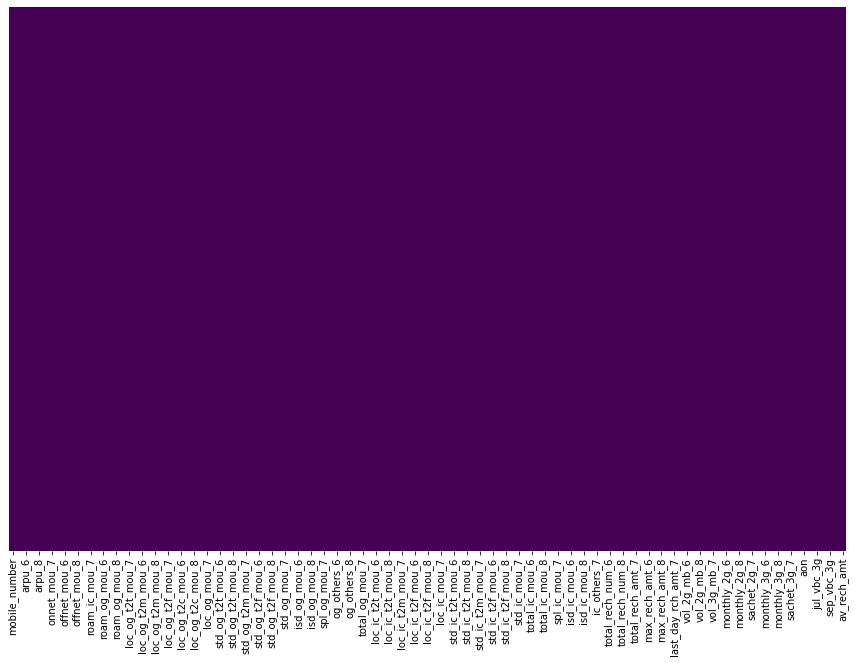

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [86]:
# Dropping all the null values from the data
# telecom = telecom.dropna(axis='rows', how='any')
telecom.shape

(2791, 129)

# Exploratory Data Analysis

In [87]:
telecom.churn.value_counts()

False    2523
True      268
Name: churn, dtype: int64

In [88]:
telecom.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6    

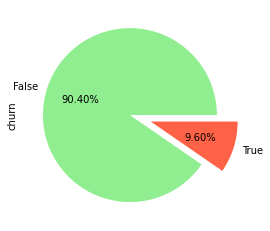

In [89]:
# Plotting the Churn vs Non Chrun customers
telecom['churn'].value_counts().plot.pie(explode=[0,0.25],
                                         autopct='%1.2f%%',
                                         colors= ["#90EE90", "#FF6347"],)

In [90]:
# sns.pariplot(telecom, hue='churn')

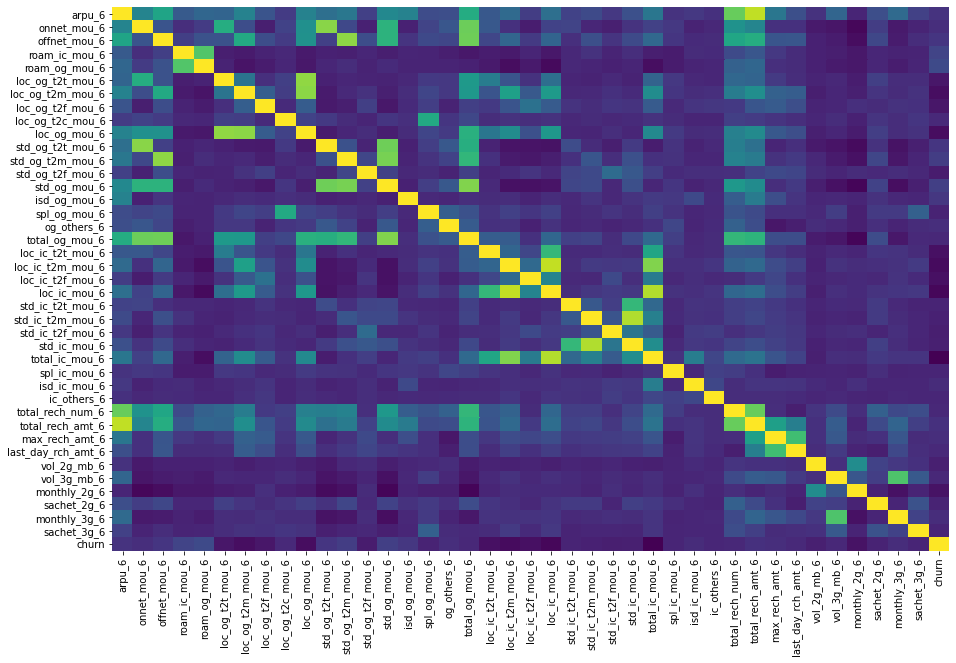

In [91]:
plt.figure(figsize=(15,10))
cols = list(telecom.filter(regex='_6'))
cols.append('churn')
sns.heatmap(telecom[cols].corr(), cbar=False, cmap='viridis')
plt.show()

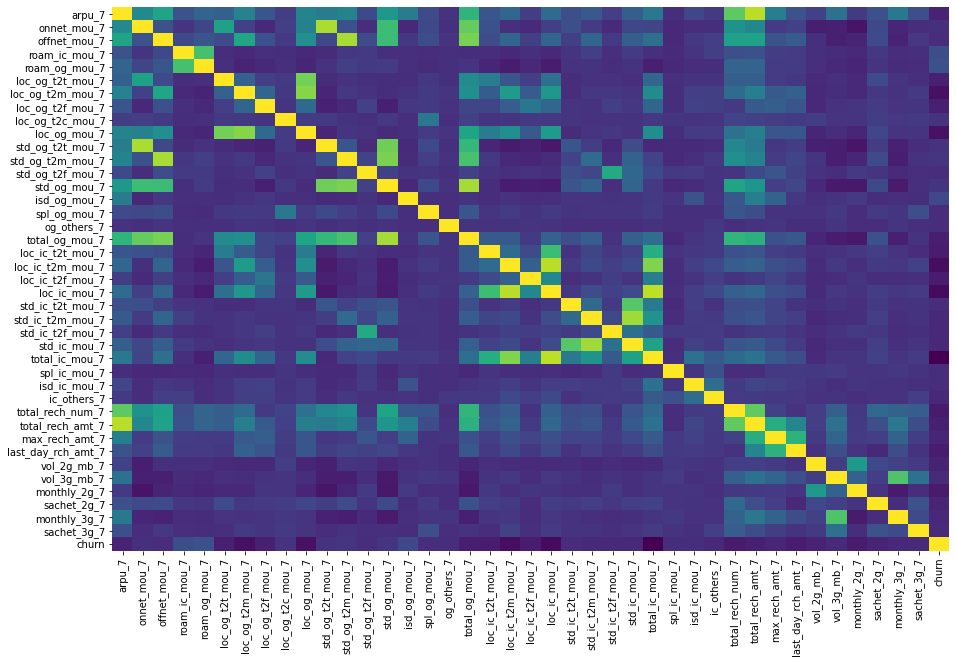

In [92]:
plt.figure(figsize=(15,10))
cols = list(telecom.filter(regex='_7'))
cols.append('churn')
sns.heatmap(telecom[cols].corr(), cbar=False, cmap='viridis')
plt.show()

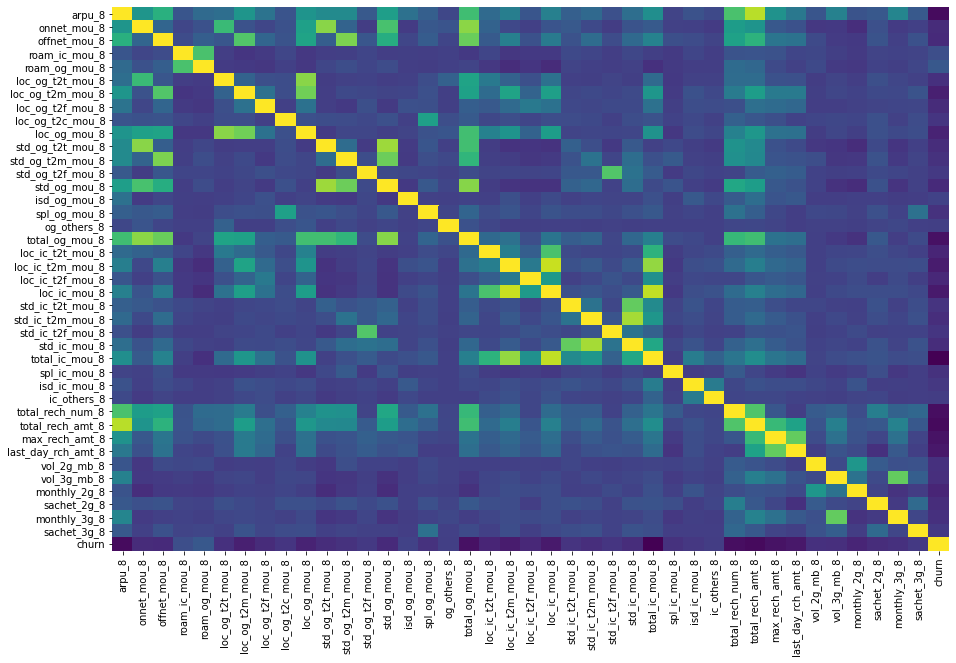

In [93]:
plt.figure(figsize=(15,10))
cols = list(telecom.filter(regex='_8'))
cols.append('churn')
sns.heatmap(telecom[cols].corr(), cbar=False, cmap='viridis')
plt.show()

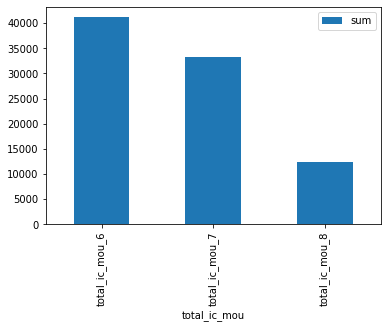

In [94]:
cols = telecom.filter(regex='total_ic_mou_').columns
cols = np.append(cols, ['churn'])
df = telecom[cols]
df = df[df['churn'] == True]
df = pd.DataFrame(data=df.filter(regex='total_ic_mou_').sum(), columns=['sum'])
df['total_ic_mou'] = df.index
df.plot.bar(x='total_ic_mou', y='sum')
plt.show()

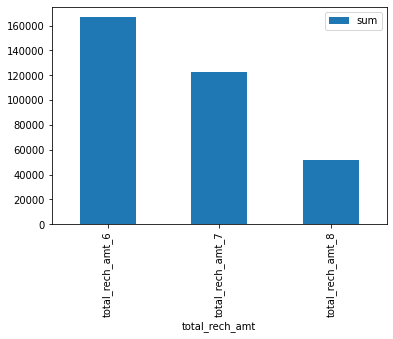

In [95]:
cols = telecom.filter(regex='total_rech_amt').columns
cols = np.append(cols, ['churn'])
df = telecom[cols]
df = df[df['churn'] == True]
df = pd.DataFrame(data=df.filter(regex='total_rech_amt').sum(), columns=['sum'])
df['total_rech_amt'] = df.index
df.plot.bar(x='total_rech_amt', y='sum')
plt.show()

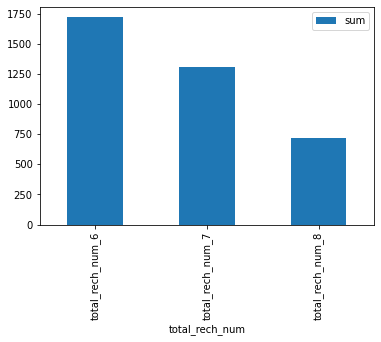

In [96]:
cols = telecom.filter(regex='total_rech_num').columns
cols = np.append(cols, ['churn'])
df = telecom[cols]
df = df[df['churn'] == True]
df = pd.DataFrame(data=df.filter(regex='total_rech_num').sum(), columns=['sum'])
df['total_rech_num'] = df.index
df.plot.bar(x='total_rech_num', y='sum')
plt.show()

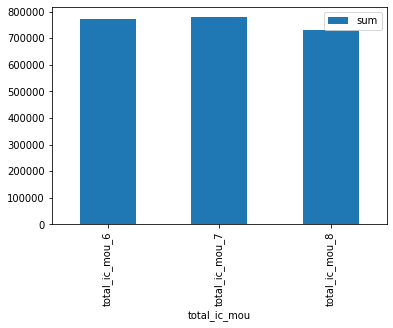

In [97]:
trend_df = pd.DataFrame(data=telecom.filter(regex='total_ic_mou_').sum(), columns=['sum'])
trend_df['total_ic_mou'] = trend_df.index
trend_df.plot.bar(x='total_ic_mou', y='sum')
plt.show()

# Model Builing Process

In [98]:
# Importing all the libraries for model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from sklearn import metrics

In [99]:
X = telecom.drop(['churn','mobile_number'], axis=1)
y = telecom['churn']

We have observer a churn rate of 5.15%

In [100]:
feature_cols = X.columns

# Handle class imbalance
nm = NearMiss()
X, y = nm.fit_sample(X, y)

# X = X.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1)

# X = X.astype('float64').dtypes

In [101]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
len(y_test)

177

## Adaboost Classifier Model

In [104]:
# Adaboost Classifier Model 
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), 
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)
y_pred3 = ada_clf.predict(X_test)
print("AdaBoostClassifier:\naccuracy_score : ", accuracy_score(y_test, y_pred3))
confusion = metrics.confusion_matrix(y_test, y_pred3)
print(confusion)
print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

AdaBoostClassifier:
accuracy_score :  0.8870056497175142
[[78 10]
 [10 79]]
TPR:  0.8876404494382022
FPR:  0.11363636363636363


## Hyperparamter tuning using Gridsearch method

In [105]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "base_estimator__criterion" : ["gini", "entropy"],
#     "base_estimator__splitter" :   ["best", "random"],
#     "base_estimator__max_depth" : [2],
#     "n_estimators": [100, 150, 200]
# }
# DTC = DecisionTreeClassifier(random_state = 11)
# ABC = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R", learning_rate=0.5)

# grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'recall')
# grid_search_ABC.fit(X_train, y_train)

# y_pred4 = grid_search_ABC.predict(X_test)
# print("AdaBoostClassifier:\naccuracy_score : ", accuracy_score(y_test, y_pred4))
# confusion = metrics.confusion_matrix(y_test, y_pred4)
# print(confusion)
# print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
# print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

In [106]:
log_clf = LogisticRegression(max_iter=200)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
)

In [107]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(confusion)
    print("TPR: ", confusion[1,1] / (confusion[1,0] + confusion[1,1]))
    print("FPR: ", confusion[0,1] / (confusion[0,0] + confusion[0,1]))

LogisticRegression 0.8757062146892656
[[80  8]
 [14 75]]
TPR:  0.8426966292134831
FPR:  0.09090909090909091
RandomForestClassifier 0.9378531073446328
[[84  4]
 [ 7 82]]
TPR:  0.9213483146067416
FPR:  0.045454545454545456
SVC 0.8926553672316384
[[79  9]
 [10 79]]
TPR:  0.8876404494382022
FPR:  0.10227272727272728
VotingClassifier 0.9322033898305084
[[83  5]
 [ 7 82]]
TPR:  0.9213483146067416
FPR:  0.056818181818181816


We are going to use **Adaboost classifier model** as our final model for identifying the churn parameters

In [115]:
#Feature Importance

dtc = DecisionTreeClassifier(random_state=100)
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_
imp = pd.DataFrame(importance, columns=['importance'])
features = pd.DataFrame(feature_cols, columns=['features'])
imp_features = imp.merge(features, left_index=True, right_index=True)
imp_features = imp_features.sort_values(by='importance', ascending=False)

imp_features[:10]

,importance,features
81,0.399836,total_ic_mou_8
2,0.260049,arpu_7
7,0.038906,offnet_mou_6
79,0.029365,total_ic_mou_6
64,0.027754,loc_ic_mou_6
121,0.024323,aon
91,0.022921,total_rech_num_6
4,0.022298,onnet_mou_6
94,0.022284,total_rech_amt_6
11,0.020877,roam_ic_mou_7


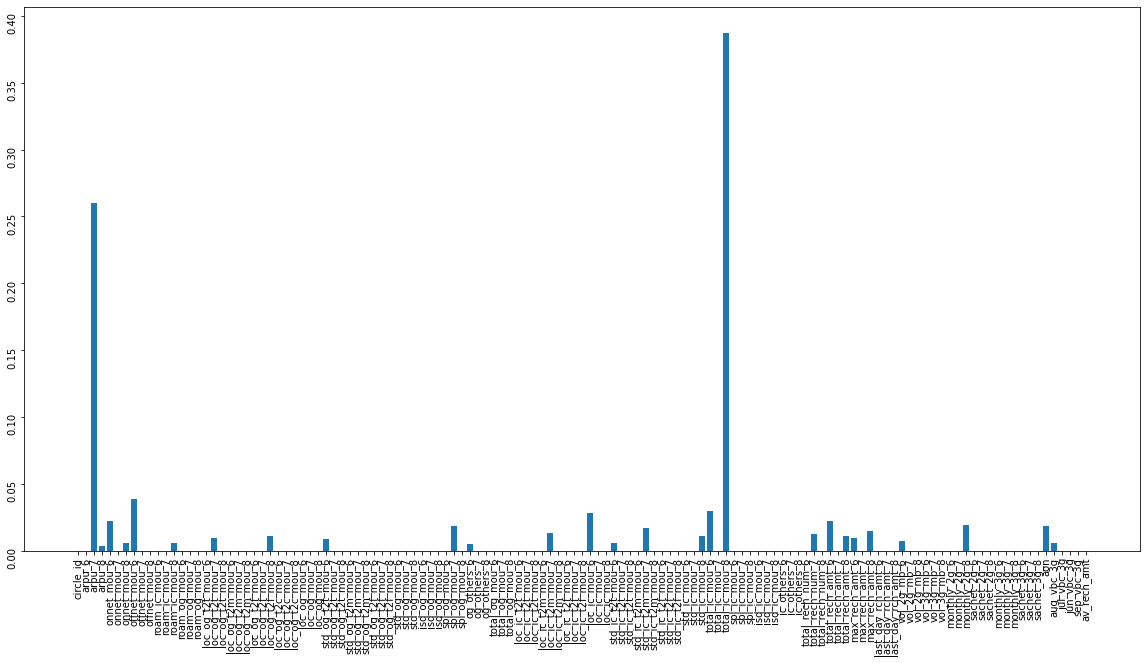

In [109]:
plt.figure(figsize=(20,10))
plt.bar(feature_cols, importance)
plt.tick_params(rotation=90)
plt.show()

In [110]:
X2 = telecom.drop('churn', axis=1)
y2 = telecom['churn']
nm = NearMiss()
X2, y2 = nm.fit_sample(X2, y2)

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca = PCA(n_components=2)
X2_reduced = pca.fit_transform(X2)
pca.explained_variance_ratio_

array([9.99986594e-01, 3.79762286e-06])

In [113]:
df = pd.DataFrame(data=X2_reduced)
df.head()
df = df.merge(y2, left_index=True, right_index=True)
df['pca1'] = df[0]
df['pca2'] = df[1]
df = df.drop(columns=[0,1], axis=1)
def check(b):
    if b:
        return 0
    else:
        return 1
df_y = y2.map(check)
colors = np.array(["blue", "green"])
df.plot.scatter(x='pca1', y='pca2', c=colors[df_y])

TypeError: ignored

In [ ]:
df_churn = df[df['churn'] == True]
df_churn.plot.scatter(x='pca1', y='pca2')

In [ ]:
df_non_churn = df[df['churn'] == False]
df_non_churn.plot.scatter(x='pca1', y='pca2')

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [ ]:
log_clf2 = LogisticRegression()
rnd_clf2 = RandomForestClassifier()
svm_clf2 = SVC()
voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('svc', svm_clf2)]
)

for clf in (log_clf2, rnd_clf2, svm_clf2, voting_clf2):
    clf.fit(X_train2, y_train2)
    y_pred2 = clf.predict(X_test2)
    print(clf.__class__.__name__, accuracy_score(y_test2, y_pred2))


In [116]:
print(imp_features[:10])

     importance          features
81     0.399836    total_ic_mou_8
2      0.260049            arpu_7
7      0.038906      offnet_mou_6
79     0.029365    total_ic_mou_6
64     0.027754      loc_ic_mou_6
121    0.024323               aon
91     0.022921  total_rech_num_6
4      0.022298       onnet_mou_6
94     0.022284  total_rech_amt_6
11     0.020877     roam_ic_mou_7


# Conclusion 

Here are the driving factors impacting the **churn** in the telecom industry: 
 
*   **ARPU (Avg revenue per user)** of **7th month** have been moved down compared to that of all the other months. 
*   All kinds of **calls** within and outside the network have **dropped** in the **6th month** of the usage by the customer
*   Age on the network has also impacted on the churn metric
*   All the local, roaming and international incoming calls have decreased in the **6th month and 8th Month**. 
*   The **recharge amount and frequncy** has dropped significantlty in the **6th month** of the usage which the customers are likely to churn.  




